In [4]:
import numpy as np
import ceiltrack
import recordreader
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
camdata = ceiltrack.genlut()

In [9]:
f = open("/opt/data/cycloid/cl20190707/cycloid-20190707-183638.rec", "rb")

B = np.zeros(3)
track = []
imgs = []

for frdata in recordreader.RecordIterator(f):
    yuv420 = frdata['yuv420']
    img = ((yuv420[:480] > 240) * 255).astype(np.uint8)
    imgs.append(img)
    xy = ceiltrack.match(img, *camdata)
    for i in range(6):
        c, dB = ceiltrack.cost(xy, *B)
        B += dB
    track.append(B.copy())
track = np.array(track)

f.close()

In [10]:
imgs = np.array(imgs)

(-3.638637585044634, 0.3672331928399766, 0.5047951548737818, 2.763384919810164)

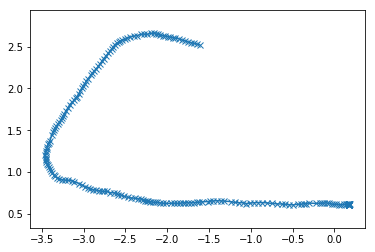

In [22]:
plt.plot(track[:200, 0], track[:200, 1], '-x')
plt.axis('equal')

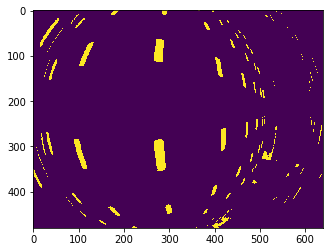

In [11]:
plt.imshow(imgs[0])

In [13]:
imgs.shape

(783, 480, 640)

In [23]:
o = open("data.raw", "wb")
o.write(imgs[:200].reshape(-1).tobytes())
o.close()


In [28]:
camdata[1].shape

(2, 166781)